# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

## ImageAnalysis3 and basic modules

In [2]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
from ImageAnalysis3 import *
from ImageAnalysis3.classes import _allowed_kwds

import h5py
import ast
import pandas as pd

print(os.getpid())

35396


## Chromatin_analysis_tools etc

See **functions** in the repository for [AnalysisTool_Chromatin](../../README.md)

In [3]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

# Define folders

In [4]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'nucleus_and_chromosome')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\nucleus_and_chromosome\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\nucleus_and_chromosome\figures.


# Plotting parameters

In [5]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [6]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5


## cell type color-codes

In [7]:
# cell labels from RNA-MERFISH and celltype prediction
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]
# cell palette from RNA-MERFISH UMAP and stats
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}


In [8]:
# this is the plotting order noted based on the snRNA transcriptional acitivty if needed
sorted_cellplot_order_byRNA = ['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 'Vip', 'Lamp5',
                   'Sst', 'Sncg', 'Pvalb', 
                               'L5/6 NP',# this was changed to be close to other Exc
                               'L4/5 IT', 'L6 CT',
                  'L6 IT', 'L6b', 'L2/3 IT', 'L5 IT', 'L5 ET']

# Load data relevant information

## load and format codebook

[merged codebook](../resources/merged_codebook.csv) as in the repository (merged for all DNA-MERFISH libraries)

In [9]:
# Load codebook 
codebook_fname = os.path.join(input_folder,'merged_codebook.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df by chr and chr_order
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)
codebook_df.head()

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_479,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604
0,1:3742742-3759944,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1:6245958-6258969,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1:8740008-8759916,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,1:9627926-9637875,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,1:9799472-9811359,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
# Format the chr loci name by 
# 1. changing loci name format
# 2. extract relevant information such as id, chr, chr_order, and library etc
from gene_to_loci import loci_pos_format
loci_name_list = list(map(loci_pos_format, codebook_df['name'].tolist()))
loci_name_arr = np.array(loci_name_list)

# convert to a new dataframe and set loci name as index
codebook_df = codebook_df[['name','id','chr','chr_order','library']]
codebook_df['loci_name'] = list(loci_name_arr[:,0])
codebook_df = codebook_df.set_index ('loci_name')

codebook_df.head()

,name,id,chr,chr_order,library
loci_name,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0.0,CTP11
chr1_6245958_6258969,1:6245958-6258969,2,1,1.0,CTP11
chr1_8740008_8759916,1:8740008-8759916,3,1,2.0,CTP11
chr1_9627926_9637875,1:9627926-9637875,1,1,3.0,CTP13
chr1_9799472_9811359,1:9799472-9811359,2,1,4.0,CTP13


# Load nuclear size

Below nuclear volume data can be generated by the notebook below:

[2_nuclei_size_by_convexhull_singlecell_dataframe](2_nuclei_size_by_convexhull_singlecell_dataframe.ipynb)

In [11]:
nuc_volume_fname = os.path.join(output_analysis_folder, f'nucleus_volume_convexhull_bysubclass.csv')

nuc_volume_df = pd.read_csv(nuc_volume_fname, index_col=0)
nuc_volume_df.head()

,subclass,nucleus_volume,total_spots
uid,,,
259202492748634617304623818845147108919,Oligo,255.043678,863
336074706103419484501535095917410831417,Oligo,298.589934,1426
179117357717369278884189379535888871018,Oligo,305.797609,1601
36321914521561890358202806077673807953,Oligo,76.777445,210
92271180002801802991585284299263797402,Oligo,376.983590,2034


## filter by spot numbers

A point indicating potential doublet: 1250


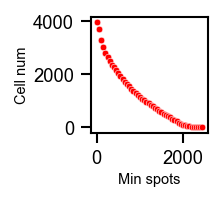

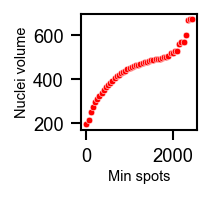

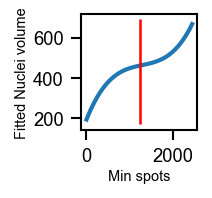

In [12]:
x = []
y = []
c = []

# a reference homogeneous celltype to guess the potential doublet 
ref_celltype = 'L2/3 IT'
for min_pts_th in np.arange(0,2500,50):
    df_plot = nuc_volume_df[nuc_volume_df['total_spots']>=min_pts_th]
    df_plot = df_plot[df_plot['subclass']==ref_celltype]
    y.append(np.median(df_plot['nucleus_volume']))
    x.append(min_pts_th)
    c.append(len(df_plot))
    
fig, ax = plt.subplots(figsize=(1,1),dpi=150)
#sns.lineplot(x=x, y=c, ax=ax, )
sns.scatterplot(x=x, y=c, ax=ax, c='r',s=10)
ax.set_xlabel("Min spots", fontsize=_font_size, labelpad=2)
ax.set_ylabel("Cell num", fontsize=_font_size, labelpad=2)

fig, ax = plt.subplots(figsize=(1,1),dpi=150)
#sns.lineplot(x=x, y=y, ax=ax, )
sns.scatterplot(x=x, y=y, ax=ax, c='r',s=10)
ax.set_xlabel("Min spots", fontsize=_font_size, labelpad=2)
ax.set_ylabel("Nuclei volume", fontsize=_font_size, labelpad=2)

# fit with 3 order polynomial for data in range (0-2000)
fig, ax = plt.subplots(figsize=(1,1),dpi=150)
coefs = np.polyfit(x,y, 3)
p = np.poly1d(coefs)
y_fit = p(x)
sns.lineplot(x=x, y=y_fit, ax=ax, linewidth=2)
ax.set_xlabel("Min spots", fontsize=_font_size, labelpad=2)
ax.set_ylabel("Fitted Nuclei volume", fontsize=_font_size, labelpad=2)


# get turning point from 2nd derivative
dy=np.diff(y_fit,1)
dx=np.diff(x,1)
yfirst = dy/dx
xfirst = 0.5*(np.array(x)[:-1]+np.array(x)[1:])
dyfirst = np.diff(yfirst,1)
dxfirst = np.diff(xfirst,1)
dysecond = dyfirst/dxfirst
sel_x = x[np.where(dysecond>0)[0][0]]

print ('A point indicating potential doublet:',sel_x)
ax.vlines(sel_x, ymin=min(ax.get_ylim()),ymax=max(ax.get_ylim()), color='red')

plt.show()

# Load RNA and ATAC sequencing data

In [13]:
RNA_count_df_dict = {'snRNA_Mouse':None, 
                     'ATAC_Mouse':None,
                     'snRNA_Human':None,
                     'MERFISH_Human':None,}

## mouse 10x snRNAseq data (MOp)

Processed snRNAseq data can be generated by notebook from below:

[external/scripts/sn_rna/2_prepare_and_rename_sn_rna_mop](../../external/scripts/sn_rna/2_prepare_and_rename_sn_rna_mop.ipynb)

In [14]:
data_key = 'snRNA_Mouse'

import scanpy as sc

sn_RNA_folder = r'L:\Shiwei\DNA_MERFISH_analysis\10x_nuclei_v3_MOp_AIBS\Analysis_10X_nuclei_v3_AIBS\processed'
sn_adata = sc.read(os.path.join(sn_RNA_folder,r'MOp_10x_sn_labeled.h5ad'))

sn_adata_ori = sn_adata.raw.to_adata()
measure_df = sn_adata_ori.obs[['umi.counts','total_counts','n_genes_by_counts','subclass_label_new','class_label_new','neuron_identity']]
sel_measure_df = measure_df[measure_df['subclass_label_new'].isin(selected_cell_labels)]
RNA_count_df_dict[data_key]=sel_measure_df
sel_measure_df.head()

,umi.counts,total_counts,n_genes_by_counts,subclass_label_new,class_label_new,neuron_identity
AAACCCAAGCTCTTCC-1L8TX_181211_01_A02,28466,28466.0,4772,L6b,Gluta,Neuronal
AAACCCAAGTCGAATA-1L8TX_181211_01_A02,19669,19669.0,3803,L6 CT,Gluta,Neuronal
AAACCCACAACCCTAA-1L8TX_181211_01_A02,9296,9296.0,2485,Vip,GABA,Neuronal
AAACCCAGTATAGCTC-1L8TX_181211_01_A02,14204,14204.0,3234,L4/5 IT,Gluta,Neuronal
AAACCCAGTCAGACTT-1L8TX_181211_01_A02,21334,21334.0,3828,L2/3 IT,Gluta,Neuronal


## define cell type order for analysis using reference data

In [15]:
# sort plotting order by meadian of groups from mouse snRNA
ref_data_key = 'snRNA_Mouse'
ref_df_mean = pd.DataFrame(RNA_count_df_dict[ref_data_key].groupby(by='subclass_label_new')['umi.counts'].median())
sel_ref_df_mean = ref_df_mean.sort_values(by='umi.counts')
sorted_cellplot_order = sel_ref_df_mean.index
sorted_cellplot_order

CategoricalIndex(['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 'Vip', 'Lamp5',
                  'L5/6 NP', 'Sst', 'Sncg', 'Pvalb', 'L4/5 IT', 'L6 CT',
                  'L6 IT', 'L6b', 'L2/3 IT', 'L5 IT', 'L5 ET'],
                 categories=['Astro', 'Endo', 'L2/3 IT', 'L5 ET', ..., 'Pvalb', 'Sncg', 'Sst', 'Vip'], ordered=False, dtype='category', name='subclass_label_new')

## human M1 snRNAseq data

Processed data can be generated by notebook below:

[external/scripts/sn_rna_human/2_prepare_and_rename_sn_rna_hm1](../../external/scripts/sn_rna_human/2_prepare_and_rename_sn_rna_hm1.ipynb)

In [16]:
data_key = 'snRNA_Human'


import scanpy as sc
#import os

sn_RNA_folder = r'L:\Shiwei\DNA_MERFISH_analysis\hM1_10x'
sn_adata = sc.read(os.path.join(sn_RNA_folder,r'hM1_10X_labeled_newname.h5ad'))

sn_adata_ori = sn_adata.raw.to_adata()
measure_df = sn_adata_ori.obs[['total_counts','n_genes_by_counts','subclass_label_new','class_label_new',]]
sel_measure_df = measure_df[measure_df['subclass_label_new'].isin(sorted_cellplot_order)]
RNA_count_df_dict[data_key]=sel_measure_df
sel_measure_df.head()

,total_counts,n_genes_by_counts,subclass_label_new,class_label_new
sample_name,,,,
AAACCCAAGGATTTCC-LKTX_190129_01_A01,14396.0,4815,Sst,GABA
AAACCCAAGTATGGCG-LKTX_190129_01_A01,12027.0,4372,L5/6 NP,Gluta
AAACCCACAAAGTGTA-LKTX_190129_01_A01,16112.0,5280,L4/5 IT,Gluta
AAACCCACACTACTTT-LKTX_190129_01_A01,2994.0,1649,L2/3 IT,Gluta
AAACCCACAGTGAGCA-LKTX_190129_01_A01,5202.0,2499,Oligo,Oligo


## human 4000 genes MERFISH

Data below is descirbed in the notebook:

[external/scripts/merfish_4000/1_human_mtg_merfish_inspection](../../external/scripts/merfish_4000/1_human_mtg_merfish_inspection.ipynb)

In [17]:
data_key = 'MERFISH_Human'

import scanpy as sc


rna_folder = r'L:\Shiwei\DNA_MERFISH_analysis\MERFISH_MTG_STG\doi_10.5061_dryad.x3ffbg7mw__v16'
rna_fname = os.path.join(rna_folder, r'MTG_4000_MERFISH_raw.h5ad')

rna_raw_adata = sc.read_h5ad(rna_fname)
rna_raw_adata.obs_names_make_unique()

np.unique(rna_raw_adata.obs['cluster_L2'].tolist())

C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


array(['eL2/3.IT', 'eL4/5.IT', 'eL5.ET', 'eL5.IT', 'eL5/6.NP', 'eL6.CT',
       'eL6.IT', 'eL6.IT.CAR3', 'eL6b', 'iLAMP5', 'iPVALB', 'iSST',
       'iVIP', 'lASC', 'lMGC', 'lOGC', 'lOPC', 'oENDO', 'oMURAL'],
      dtype='<U11')

### change cell type labels

In [18]:
rna_raw_adata.obs['subclass_label_new'] = rna_raw_adata.obs['cluster_L2'] 

new_subclass_dict = {'eL2/3.IT':'L2/3 IT', 
                     'eL4/5.IT':'L4/5 IT',
                     'eL5.ET':'L5 ET', 
                     'eL5.IT':'L5 IT', 
                     'eL5/6.NP':'L5/6 NP', 
                     'eL6.CT':'L6 CT',
                     'eL6.IT':'L6 IT', 
                     'eL6b':'L6b', 
                     'iLAMP5':'Lamp5',
                     'iPVALB':'Pvalb',
                     'iLAMP5':'Lamp5',
                     'iSST':'Sst',
                     'iVIP':'Vip',
                     'lASC':'Astro', 'lMGC':'Micro', 'lOGC':'Oligo', 'lOPC':'OPC', 'oENDO':'Endo', }

rna_raw_adata.obs = rna_raw_adata.obs.replace({'subclass_label_new':new_subclass_dict})
np.unique(rna_raw_adata.obs['subclass_label_new'].tolist())

array(['Astro', 'Endo', 'L2/3 IT', 'L4/5 IT', 'L5 ET', 'L5 IT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6b', 'Lamp5', 'Micro', 'OPC', 'Oligo', 'Pvalb',
       'Sst', 'Vip', 'eL6.IT.CAR3', 'oMURAL'], dtype='<U11')

In [19]:
# define cell type for human data plotting
hm_sorted_cellplot_order = ['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 
                           'Vip', 'Lamp5', 
                            'Sst',  'Pvalb', 'L5/6 NP',
                            'L4/5 IT', 'L6 CT',
                            'L6 IT','L6b','L2/3 IT', 'L5 IT', 'L5 ET']

measure_df = rna_raw_adata.obs[['total_counts','n_genes_by_counts','subclass_label_new']]
sel_measure_df = measure_df[measure_df['subclass_label_new'].isin(hm_sorted_cellplot_order)]
RNA_count_df_dict[data_key]=sel_measure_df
sel_measure_df.head()

,total_counts,n_genes_by_counts,subclass_label_new
fov_101_feature_3,3976,1202,L5 IT
fov_101_feature_5,1908,804,L5 IT
fov_101_feature_6,2069,840,L5/6 NP
fov_102_feature_3,3136,1165,L5 IT
fov_102_feature_5,2552,984,L5 IT


## mouse atac seq data (MOp)

Data below can be generated using the notebook as:

[external/scripts/sn_atac/3_label_atac_anndata_mop_episcanpy](../../external/scripts/sn_atac/3_label_atac_anndata_mop_episcanpy.ipynb)

In [20]:
data_key = 'ATAC_Mouse'

import scanpy as sc

atac_folder = r'L:\Shiwei\DNA_MERFISH_analysis\Analysis_MOp_methylation_ATAC\data\EckerRen_Mouse_MOp_methylation_ATAC'
atac_adata_ori  = sc.read(os.path.join(atac_folder,r'MOp_ATAC_combined_labeled.h5ad'))

measure_df = atac_adata_ori.obs[['UM','nb_features','subclass_label_new','class_label_new','neuron_identity']]
sel_measure_df = measure_df[measure_df['subclass_label_new'].isin(sorted_cellplot_order)]
RNA_count_df_dict[data_key]=sel_measure_df
sel_measure_df.head()

,UM,nb_features,subclass_label_new,class_label_new,neuron_identity
4,17586.0,4047,L5 IT,Gluta,Neuronal
5,13837.0,3585,L6 CT,Gluta,Neuronal
6,26303.0,8088,L6 IT,Gluta,Neuronal
8,42880.0,11948,L5 IT,Gluta,Neuronal
9,2655.0,729,L2/3 IT,Gluta,Neuronal


In [21]:
sub_sorted_cellplot_order =['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 
                  'Sst',  'Pvalb',  'L5/6 NP', 'L4/5 IT', 'L6 CT',
                  'L6 IT', 'L2/3 IT', 'L5 IT', 'L5 ET']

In [22]:
#sorted_cellplot_order_byRNA

# Plot boxplot figures

In [23]:
RNA_count_df_dict.keys()

dict_keys(['snRNA_Mouse', 'ATAC_Mouse', 'snRNA_Human', 'MERFISH_Human'])

## plot snRNAseq for mouse MOp

meta NOT subset; don't know how to subset; dropped


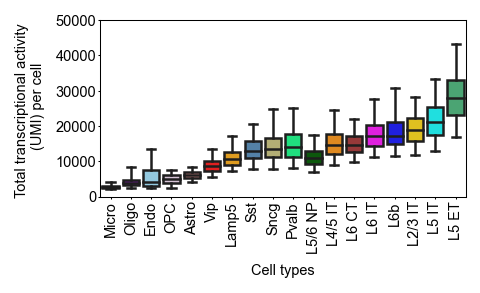

In [24]:
%matplotlib inline

import seaborn as sns
import scanpy as sc


df_plot = RNA_count_df_dict['snRNA_Mouse']

# plot
fig, ax = plt.subplots(figsize=(_page_width/3.5*5/2.5,_page_width/3.6),dpi=150)

sns.boxplot(data=df_plot, x='subclass_label_new', y='total_counts', 
            order = sorted_cellplot_order_byRNA, 
            ax=ax, 
            fliersize=0,
            whis=[5, 95],
            #boxprops={'linewidth': 0.5}
            palette=celltype_palette)

#ax.set_xticklabels(sorted_types, rotation=70, fontsize=12)
plt.tick_params(axis='y', labelsize=_font_size, pad=2) 
plt.tick_params(axis='x', rotation=90, labelsize=_font_size, pad=2) 

ax.set_xlabel("Cell types", fontsize=_font_size, labelpad=5)
ax.set_ylabel("Total transcriptional activity \n (UMI) per cell", fontsize=_font_size, labelpad=5)


ax.set_ylim([0,50000])
ax.grid(False)
ax.tick_params(axis='both', pad =1, length=1, width=0.5, labelsize=7) 
[i[1].set_linewidth(0.5) for i in ax.spines.items()]

plt.savefig(os.path.join(output_figure_folder, f'10x_snRNAseq_UMI_mouse.pdf'), 
            transparent=True, dpi=300, bbox_inches='tight')

plt.show()



## plot snRNAseq for human M1

meta NOT subset; don't know how to subset; dropped


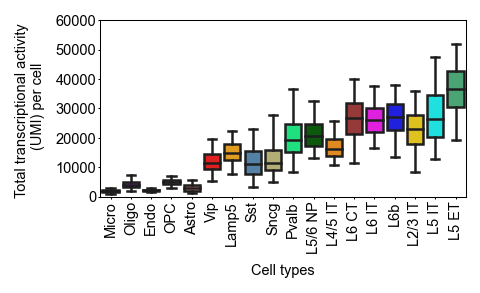

In [25]:
%matplotlib inline

import seaborn as sns
import scanpy as sc


df_plot = RNA_count_df_dict['snRNA_Human']

# plot
fig, ax = plt.subplots(figsize=(_page_width/3.5*5/2.5,_page_width/3.6),dpi=150)

sns.boxplot(data=df_plot, x='subclass_label_new', y='total_counts', 
            order = sorted_cellplot_order_byRNA, 
            ax=ax, 
            fliersize=0,
            whis=[5, 95],
            #boxprops={'linewidth': 0.5}
            palette=celltype_palette)

#ax.set_xticklabels(sorted_types, rotation=70, fontsize=12)
plt.tick_params(axis='y', labelsize=_font_size, pad=2) 
plt.tick_params(axis='x', rotation=90, labelsize=_font_size, pad=2) 

ax.set_xlabel("Cell types", fontsize=_font_size, labelpad=5)
ax.set_ylabel("Total transcriptional activity \n (UMI) per cell", fontsize=_font_size, labelpad=5)


ax.set_ylim([0,60000])
ax.grid(False)
ax.tick_params(axis='both', pad =1, length=1, width=0.5, labelsize=7) 
[i[1].set_linewidth(0.5) for i in ax.spines.items()]

plt.savefig(os.path.join(output_figure_folder, f'10x_snRNAseq_UMI_human.pdf'), 
            transparent=True, dpi=300, bbox_inches='tight')

plt.show()



## plot MERFISH for human MTG

meta NOT subset; don't know how to subset; dropped


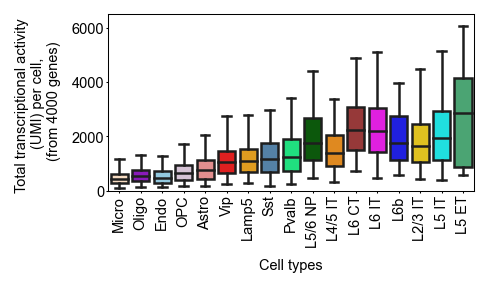

In [26]:
%matplotlib inline

import seaborn as sns
import scanpy as sc


df_plot = RNA_count_df_dict['MERFISH_Human']

# plot
fig, ax = plt.subplots(figsize=(_page_width/3.5*5/2.5,_page_width/3.6),dpi=150)

sns.boxplot(data=df_plot, x='subclass_label_new', y='total_counts', 
            order = hm_sorted_cellplot_order, 
            ax=ax, 
            fliersize=0,
            whis=[5, 95],
            #boxprops={'linewidth': 0.5}
            palette=celltype_palette)

#ax.set_xticklabels(sorted_types, rotation=70, fontsize=12)
plt.tick_params(axis='y', labelsize=_font_size, pad=2) 
plt.tick_params(axis='x', rotation=90, labelsize=_font_size, pad=2) 

ax.set_xlabel("Cell types", fontsize=_font_size, labelpad=5)
ax.set_ylabel("Total transcriptional activity \n (UMI) per cell, \n (from 4000 genes)", fontsize=_font_size, labelpad=5)


ax.set_ylim([0,6500])
ax.grid(False)
ax.tick_params(axis='both', pad =1, length=1, width=0.5, labelsize=7) 
[i[1].set_linewidth(0.5) for i in ax.spines.items()]

plt.savefig(os.path.join(output_figure_folder, f'10x_MERFISH_total_count_human.pdf'), 
            transparent=True, dpi=300, bbox_inches='tight')

plt.show()



## plot nuclear size from DNA-MERFISH data

meta NOT subset; don't know how to subset; dropped


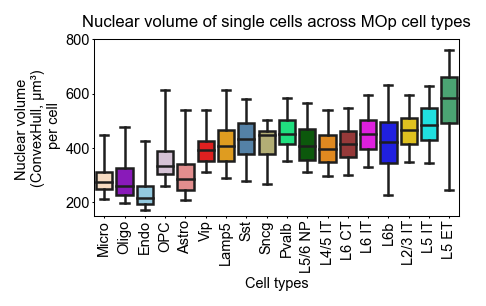

In [27]:

%matplotlib inline

import seaborn as sns
import scanpy as sc

# threshold determined above
min_pts_th = 1250

# sort plotting order by meadian of groups
df_plot = nuc_volume_df[nuc_volume_df['total_spots']>=min_pts_th]


# plot
#fig, ax = plt.subplots(figsize=(_page_width/3*5/2.5,_page_width/3),dpi=150)
fig, ax = plt.subplots(figsize=(_page_width/3.5*5/2.5,_page_width/3.6),dpi=150)

sns.boxplot(data=df_plot, x='subclass', y='nucleus_volume', 
            order = sorted_cellplot_order_byRNA, 
            ax=ax, 
            fliersize=0,
            whis=[5, 95],
            #boxprops={'linewidth': 0.5}
            palette=celltype_palette)

#ax.set_xticklabels(sorted_types, rotation=70, fontsize=12)
plt.tick_params(axis='y', labelsize=_font_size, pad=2) 
plt.tick_params(axis='x', rotation=90, labelsize=_font_size, pad=2) 

ax.set_xlabel("Cell types", fontsize=_font_size, labelpad=2)
ax.set_ylabel("Nuclear volume \n (ConvexHull, \u03bcm\u00b3) \n per cell", fontsize=_font_size, labelpad=2)
ax.set_title(f"Nuclear volume of single cells across MOp cell types", fontsize=_font_size+1, y=1)

#ax.set_xticklabels(sorted_types, rotation=70, fontsize=12)
plt.tick_params(axis='y', labelsize=_font_size) 
plt.tick_params(axis='x', rotation=90, labelsize=_font_size) 


#ax.set_xlim([0,3050])
ax.set_ylim([150,800])
ax.grid(False)
ax.tick_params(axis='both', pad =1, length=1, width=0.5, labelsize=7) 
[i[1].set_linewidth(0.5) for i in ax.spines.items()]

plt.savefig(os.path.join(output_figure_folder, f'nuclear_size_convexHull.pdf'), 
            transparent=True, dpi=300, bbox_inches='tight')

plt.show()

# Plot scatterplot figures for correlation


## correlate 10x snRNA and nuclear size

In [28]:
# concat information for RNA and nuclear size
sel_nuc_volume_df = nuc_volume_df[nuc_volume_df['total_spots']>=min_pts_th]
sel_nuc_volume_median = pd.DataFrame(sel_nuc_volume_df.groupby(by='subclass')['nucleus_volume'].median())

# get corresponding RNA df
sel_RNA_df = RNA_count_df_dict['snRNA_Mouse']
# merge df by shared index, which is the subclass
sel_nuc_volume_median['total_counts'] = sel_RNA_df.groupby(by='subclass_label_new')['total_counts'].median()
sel_nuc_volume_median['n_genes_by_counts'] = sel_RNA_df.groupby(by='subclass_label_new')['n_genes_by_counts'].median()

# pass celltype info to a column
sel_nuc_volume_median['celltype'] = sel_nuc_volume_median.index
sel_nuc_volume_median.head(10)

,nucleus_volume,total_counts,n_genes_by_counts,celltype
subclass,,,,
Astro,285.322546,6120.0,1885.0,Astro
Endo,216.955357,4115.0,1625.0,Endo
L2/3 IT,465.983908,18831.0,3755.0,L2/3 IT
L4/5 IT,397.059153,14654.0,3256.0,L4/5 IT
L5 ET,585.822123,27830.5,4710.5,L5 ET
L5 IT,484.328127,21118.0,3954.0,L5 IT
L5/6 NP,409.126734,10853.0,2807.0,L5/6 NP
L6 CT,416.027680,14703.0,3269.0,L6 CT
L6 IT,452.559266,17063.0,3530.0,L6 IT


meta NOT subset; don't know how to subset; dropped


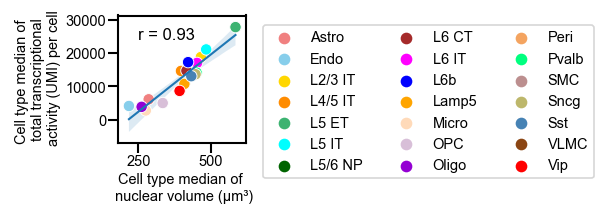

In [29]:
# plot
df_plot = sel_nuc_volume_median.copy(deep=True)

fig, ax = plt.subplots(figsize=(_page_width/5,_page_width/5),dpi=150)

x_col = 'nucleus_volume'
y_col = 'total_counts'


gfg = sns.regplot(data=df_plot, x= x_col, y = y_col, ax=ax,
                  ci=95,scatter=False,
                  line_kws={'linewidth':1}
                 )
gfg = sns.scatterplot(data=df_plot, 
                      x= x_col, y = y_col, ax=ax,
                        #legend='full',
                        hue ='celltype',
                      #linewidth = 0,
                        palette=celltype_palette,
                        s=30,
                   )
plt.legend(bbox_to_anchor=(1.02, 1.04), loc='upper left', ncols=3, borderaxespad=1,fontsize=_font_size)

from scipy.stats import spearmanr, pearsonr
valid_ids = np.isfinite(df_plot[x_col].values) & np.isfinite(df_plot[y_col].values)
r_val = pearsonr(df_plot[x_col].values[valid_ids], df_plot[y_col].values[valid_ids],)[0]
#r_val = spearmanr(df_plot[x_col].values, df_plot[y_col].values, nan_policy = 'omit')[0]

ax.text(250,24000,f'r = {round(r_val,2)}',fontsize=_font_size+1)


ax.tick_params('x', labelsize=_font_size, 
                    #width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelbottom=True) # remove bottom ticklabels for _ax
ax.tick_params('y', labelsize=_font_size, 
                #width=_ticklabel_width, #length=0,
                pad=1, labelleft=True)


ax.set_xlabel('Cell type median of \n nuclear volume (\u03bcm\u00b3)',fontsize=_font_size,labelpad=2)

ax.set_ylabel(f'Cell type median of \n total transcriptional \n activity (UMI) per cell', fontsize=_font_size, labelpad=2)


ax.grid(False)
ax.margins(0.1)
plt.savefig(os.path.join(output_figure_folder, f'corr_nuclear_size_and_RNA_count.pdf'), 
            transparent=True, dpi=300, bbox_inches='tight')

plt.show()
    

## correlate chromatin accessibility and nuclear size

In [30]:
# concat information for ATAC and nuclear size
sel_nuc_volume_df = nuc_volume_df[nuc_volume_df['total_spots']>=min_pts_th]
sel_nuc_volume_median = pd.DataFrame(sel_nuc_volume_df.groupby(by='subclass')['nucleus_volume'].median())

# get corresponding RNA df
sel_RNA_df = RNA_count_df_dict['ATAC_Mouse']
# merge df by shared index, which is the subclass
sel_nuc_volume_median['total_counts'] = sel_RNA_df.groupby(by='subclass_label_new')['UM'].median()
sel_nuc_volume_median['n_genes_by_counts'] = sel_RNA_df.groupby(by='subclass_label_new')['nb_features'].median()

# pass celltype info to a column
sel_nuc_volume_median['celltype'] = sel_nuc_volume_median.index
sel_nuc_volume_median.head(10)

,nucleus_volume,total_counts,n_genes_by_counts,celltype
subclass,,,,
Astro,285.322546,3708.5,1358.0,Astro
Endo,216.955357,3214.0,1246.5,Endo
L2/3 IT,465.983908,6993.0,2841.0,L2/3 IT
L4/5 IT,397.059153,6227.5,2348.5,L4/5 IT
L5 ET,585.822123,8542.0,3863.0,L5 ET
L5 IT,484.328127,7838.5,3224.0,L5 IT
L5/6 NP,409.126734,5120.5,1990.5,L5/6 NP
L6 CT,416.027680,6381.0,2493.0,L6 CT
L6 IT,452.559266,7009.0,2793.0,L6 IT


meta NOT subset; don't know how to subset; dropped


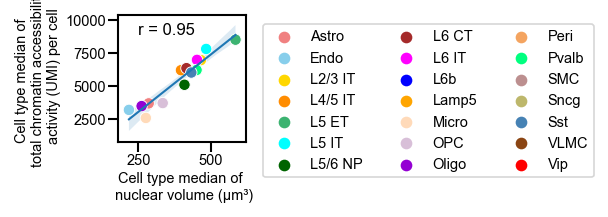

In [31]:
# plot
df_plot = sel_nuc_volume_median.copy(deep=True)

fig, ax = plt.subplots(figsize=(_page_width/5,_page_width/5),dpi=150)

x_col = 'nucleus_volume'
y_col = 'total_counts'


gfg = sns.regplot(data=df_plot, x= x_col, y = y_col, ax=ax,
                  ci=95,scatter=False,
                  line_kws={'linewidth':1}
                 )
gfg = sns.scatterplot(data=df_plot, 
                      x= x_col, y = y_col, ax=ax,
                        #legend='full',
                        hue ='celltype',
                      #linewidth = 0,
                        palette=celltype_palette,
                        s=30,
                   )
plt.legend(bbox_to_anchor=(1.02, 1.04), loc='upper left', ncols=3, borderaxespad=1,fontsize=_font_size)

from scipy.stats import spearmanr, pearsonr
valid_ids = np.isfinite(df_plot[x_col].values) & np.isfinite(df_plot[y_col].values)
r_val = pearsonr(df_plot[x_col].values[valid_ids], df_plot[y_col].values[valid_ids],)[0]
#r_val = spearmanr(df_plot[x_col].values, df_plot[y_col].values, nan_policy = 'omit')[0]

ax.text(250,8900,f'r = {round(r_val,2)}',fontsize=_font_size+1)


ax.tick_params('x', labelsize=_font_size, 
                    #width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelbottom=True) # remove bottom ticklabels for _ax
ax.tick_params('y', labelsize=_font_size, 
                #width=_ticklabel_width, #length=0,
                pad=1, labelleft=True)


ax.set_xlabel('Cell type median of \n nuclear volume (\u03bcm\u00b3)',fontsize=_font_size,labelpad=2)

ax.set_ylabel(f'Cell type median of \n total chromatin accessibility \n activity (UMI) per cell', fontsize=_font_size, labelpad=2)


ax.grid(False)
ax.margins(0.1)
plt.savefig(os.path.join(output_figure_folder, f'corr_nuclear_size_and_ATAC_count.pdf'), 
            transparent=True, dpi=300, bbox_inches='tight')

    

## correlate number of accessible regions and nuclear size

meta NOT subset; don't know how to subset; dropped


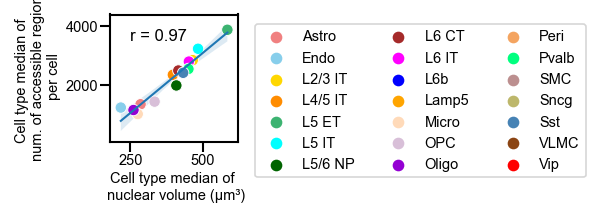

In [32]:
# plot
df_plot = sel_nuc_volume_median.copy(deep=True)

fig, ax = plt.subplots(figsize=(_page_width/5,_page_width/5),dpi=150)

x_col = 'nucleus_volume'
y_col = 'n_genes_by_counts'



gfg = sns.regplot(data=df_plot, x= x_col, y = y_col, ax=ax,
                  ci=95,scatter=False,
                  line_kws={'linewidth':1}
                 )
gfg = sns.scatterplot(data=df_plot, 
                      x= x_col, y = y_col, ax=ax,
                        #legend='full',
                        hue ='celltype',
                      #linewidth = 0,
                        palette=celltype_palette,
                        s=30,
                   )
plt.legend(bbox_to_anchor=(1.02, 1.04), loc='upper left', ncols=3, borderaxespad=1,fontsize=_font_size)

from scipy.stats import spearmanr, pearsonr
valid_ids = np.isfinite(df_plot[x_col].values) & np.isfinite(df_plot[y_col].values)
r_val = pearsonr(df_plot[x_col].values[valid_ids], df_plot[y_col].values[valid_ids],)[0]
#r_val = spearmanr(df_plot[x_col].values, df_plot[y_col].values, nan_policy = 'omit')[0]

ax.text(250,3500,f'r = {round(r_val,2)}',fontsize=_font_size+1)


ax.tick_params('x', labelsize=_font_size, 
                    #width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelbottom=True) # remove bottom ticklabels for _ax
ax.tick_params('y', labelsize=_font_size, 
                #width=_ticklabel_width, #length=0,
                pad=1, labelleft=True)


ax.set_xlabel('Cell type median of \n nuclear volume (\u03bcm\u00b3)',fontsize=_font_size,labelpad=2)

ax.set_ylabel(f'Cell type median of \n num. of accessible region \n per cell', fontsize=_font_size, labelpad=2)


ax.grid(False)
ax.margins(0.1)
plt.savefig(os.path.join(output_figure_folder, f'corr_nuclear_size_and_ATAC_accessible_regions.pdf'), 
            transparent=True, dpi=300, bbox_inches='tight')

    

    